## Python statistics essential training - 02_04_cleaning

Standard imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
billboard = pd.read_csv('billboard.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7614: invalid start byte

In [5]:
!file

'file' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!file billboard.csv

'file' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
billboard = pd.read_csv('billboard.csv', encoding='latin-1')

In [8]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

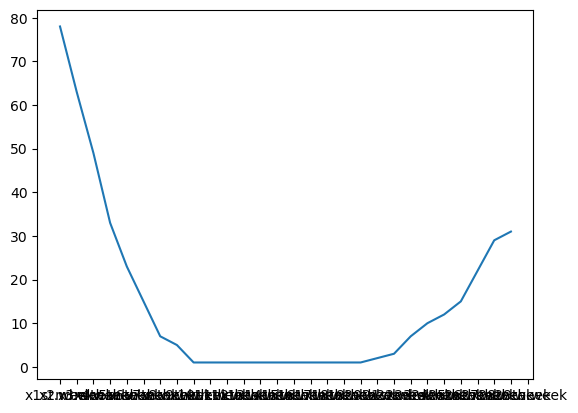

In [10]:
pp.plot(billboard.loc[0, 'x1st.week':'x76th.week'])

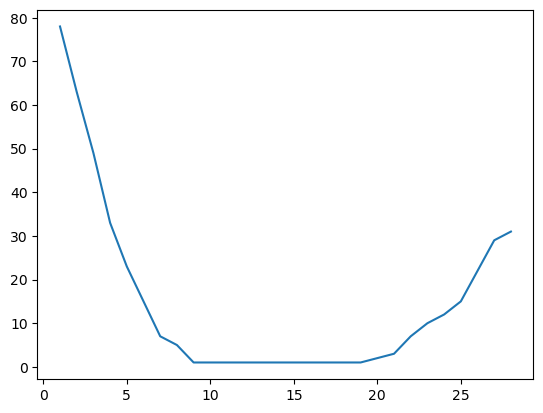

In [11]:
pp.plot(range(1,77), billboard.loc[0, 'x1st.week':'x76th.week'])

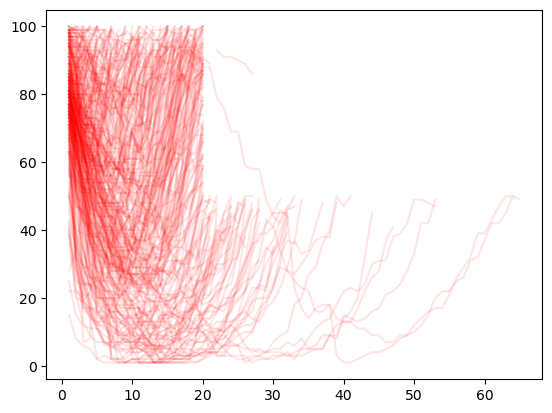

In [12]:
for index, row in billboard.iterrows():
    pp.plot(range(1,77), row['x1st.week':'x76th.week'], color='red', alpha=0.1)

In [13]:
bshort = billboard[['artist.inverted', 'track', 'time', 'date.entered', 'x1st.week', 'x2nd.week', 'x3rd.week']]

In [14]:
bshort.head()

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [15]:
bshort.columns = ['artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3']
bshort.head()

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [16]:
bmelt = bshort.melt(['artist', 'track','time', 'date.entered'],['wk1', 'wk2', 'wk3'], 'week', 'rank')
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0


In [17]:
bmelt.query('track == "Liar"')

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


In [18]:
bmelt['week'] = bmelt['week'].apply(lambda s: int(s[2]))

In [19]:
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0
3,Madonna,Music,3:45,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0


In [20]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])

In [21]:
bmelt['date.entered'][0]+ pd.Timedelta('7 days')

Timestamp('2000-09-30 00:00:00')

In [22]:
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week'] - 1)

In [23]:
bmelt.head()

,artist,track,time,date.entered,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0,1999-10-23
3,Madonna,Music,3:45,2000-08-12,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0,2000-08-05


In [24]:
bmelt.drop(['date.entered'], axis=1, inplace=True)

In [25]:
bmelt.query('track == "Liar"')

,artist,track,time,week,rank,date
66,Profyle,Liar,3:57,1,52.0,2000-09-16
383,Profyle,Liar,3:57,2,32.0,2000-09-23
700,Profyle,Liar,3:57,3,25.0,2000-09-30


In [26]:
bfinal = bmelt[['artist', 'track', 'time', 'date', 'week', 'rank']]
bfinal.sort_values(['artist', 'track'], inplace=True)

In [27]:
bfinal.head()

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [31]:
tracks = bfinal[['artist', 'track', 'time']].drop_duplicates()
tracks.head()

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [32]:
tracks.index.name = 'id'
tracksid = tracks.reset_index()
tracksid.head()

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [34]:
pd.merge(tracksid, bfinal, on=['track', 'artist']).head()

,id,artist,track,time_x,time_y,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-09,2,87.0


In [35]:
pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).head()

,id,artist,track,time,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [36]:
tidy = pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).drop(['artist', 'track', 'time'], axis=1)
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [38]:
tidy.loc[tidy[tidy.week == 1]['rank'].idxmin()]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                   15.0
Name: 756, dtype: object

In [40]:
tracksid.query('id == 1')

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18
